# Innemiljømonitor data analyse

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('thingspeak_20250327.csv')

df['created_at'] = pd.to_datetime(df['created_at']) # Konverterer til en Python DateTime

# 2. Sett created_at som indeks
df.set_index("created_at", inplace=True)

# 3. Beregn gjennomsnitt per time
df = df.resample('H').mean()

# 4. (Valgfritt) Nullstill indeks hvis du vil ha en vanlig DataFrame igjen
df = df.reset_index()

# Tar bort ekstremverdiene for TVOS
df = df[(df["TVOC"] >= 10) & (df["TVOC"] <= 2000)]
# Hopper over tidlige data
df = df[df["created_at"] >= '2025-03-23'] 

# Data i et intervall
#df = df[(df["created_at"] >= '2025-03-25') & (df["created_at"] < '2025-03-26')] 

df.head()

,created_at,entry_id,TVOC,Humidity,Pressure,Temperature (AHT20),Temperature (BMP280),latitude,longitude,elevation,status
67,2025-03-23 14:00:00+01:00,101.5,426.750000,33.353778,101617.579167,23.456391,23.784790,NaN,NaN,NaN,NaN
68,2025-03-23 15:00:00+01:00,130.0,495.636364,31.676896,101559.021212,24.096154,24.420575,NaN,NaN,NaN,NaN
69,2025-03-23 16:00:00+01:00,157.5,493.818182,31.705336,101527.886364,24.056149,24.383693,NaN,NaN,NaN,NaN
70,2025-03-23 17:00:00+01:00,187.0,343.837838,32.474187,101506.656757,23.611878,23.934462,NaN,NaN,NaN,NaN
71,2025-03-23 18:00:00+01:00,213.5,277.312500,31.987381,101499.518750,23.682178,24.006810,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,entry_id,TVOC,Humidity,Pressure,Temperature (AHT20),Temperature (BMP280),latitude,longitude,elevation,status
count,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,1518.000000,0.0,0.0,0.0,0.0
mean,759.500000,376.204216,31.311242,100902.874506,23.896926,24.254034,NaN,NaN,NaN,NaN
std,438.353168,2601.991180,1.720616,552.048368,0.449536,0.454601,NaN,NaN,NaN,NaN
min,1.000000,122.000000,22.181610,100150.800000,20.333860,20.604310,NaN,NaN,NaN,NaN
25%,380.250000,187.000000,30.436353,100320.375000,23.683740,24.042585,NaN,NaN,NaN,NaN
50%,759.500000,256.000000,31.432105,100805.150000,23.884580,24.223290,NaN,NaN,NaN,NaN
75%,1138.750000,336.000000,32.137370,101490.475000,24.121090,24.482520,NaN,NaN,NaN,NaN
max,1518.000000,99999.000000,49.205590,102436.300000,26.582720,26.933130,NaN,NaN,NaN,NaN


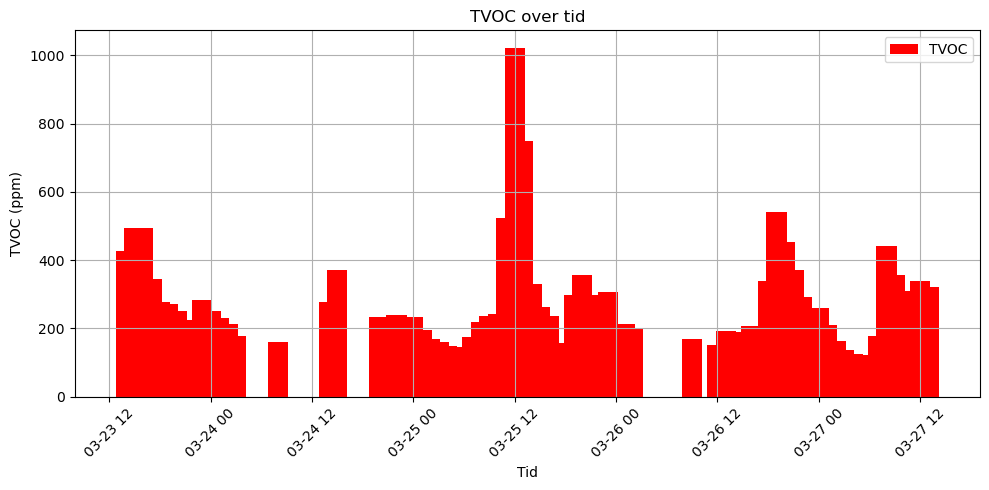

In [29]:

plt.figure(figsize=(10, 5))

#plt.plot(df["created_at"], df["TVOC"], marker="", linestyle="-", label="Temp. (AHT)")
plt.bar(df["created_at"], df["TVOC"], label="TVOC", width=0.1, color='red')
plt.xlabel("Tid")
plt.ylabel("TVOC (ppm)")
plt.title("TVOC over tid")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
# Vise grafen
plt.show()

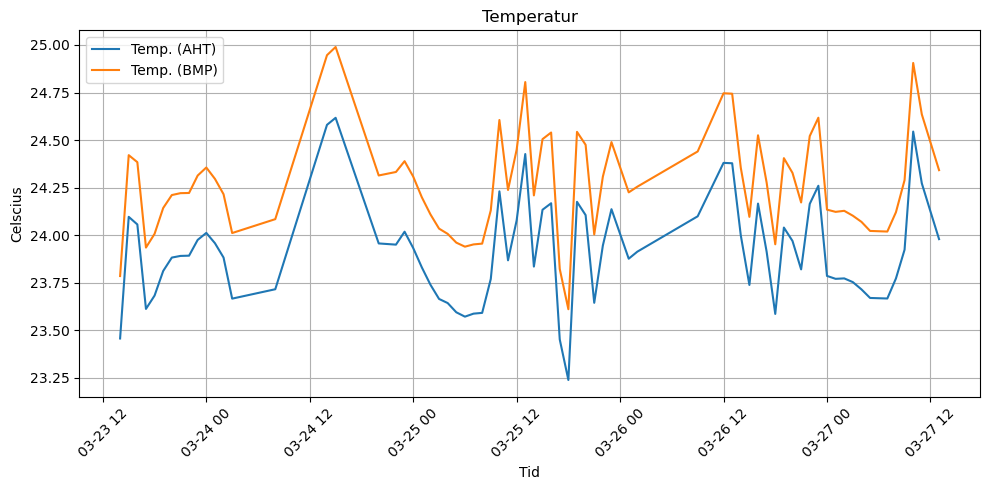

In [31]:
plt.figure(figsize=(10, 5))

plt.plot(df["created_at"], df["Temperature (AHT20)"], marker="", linestyle="-", label="Temp. (AHT)")

plt.plot(df["created_at"], df["Temperature (BMP280)"], marker="", linestyle="-", label="Temp. (BMP)")

plt.xlabel("Tid")
plt.ylabel("Celscius")
plt.title("Temperatur")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()


# Vise grafen
plt.show()
